In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

<h4>Loading clothing dataset</h4>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
print(train_images.shape)
print(train_images[0, 23, 23])
print('60000 images of size 28x28 pixels represented in grayscale')

(60000, 28, 28)
194
60000 images of size 28x28 pixels represented in grayscale


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-28 14:24:22.144644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 14:24:22.144745: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2


2022-04-28 14:24:22.724219: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-28 14:24:22.922497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 4ms/step - loss: 0.4975 - accuracy: 0.8257
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3764 - accuracy: 0.8643


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test accuracy: ', test_acc)

 31/313 [=>............................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8690

2022-04-28 14:24:39.807336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 0.8448
Test accuracy:  0.8448000550270081


In [8]:
class Missmatch:
    def __init__(self, img, expected, guess):
        self.img = img
        self.expected = expected
        self.guess = guess

    def plot(self):
        plt.figure()
        plt.imshow(self.img, cmap=plt.cm.binary)
        plt.title('Expected: {}'.format(class_names[self.expected]))
        plt.xlabel('Guess: {}'.format(class_names[self.guess]))
        plt.colorbar()
        plt.show()

In [9]:
predictions = model.predict(test_images)

length = len(predictions)

missmatches = np.array([missmatch for missmatch in [Missmatch(test_images[i], test_labels[i], np.argmax(predictions[i])) for i in range(length) if test_labels[i] != np.argmax(predictions[i])] if missmatch.guess != missmatch.expected])

2022-04-28 14:24:41.102693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Missmatches:  1552


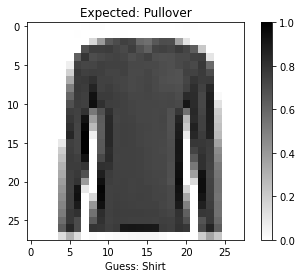

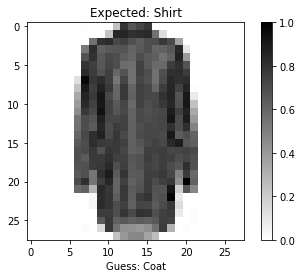

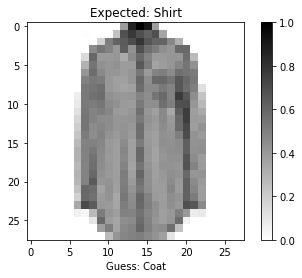

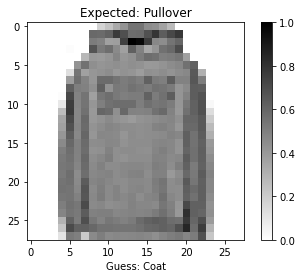

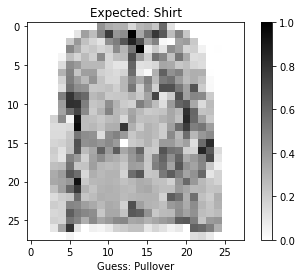

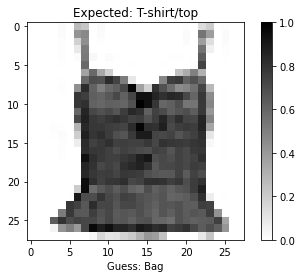

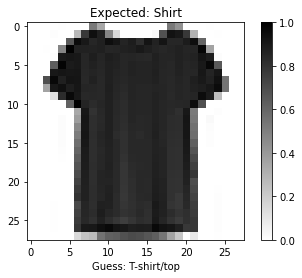

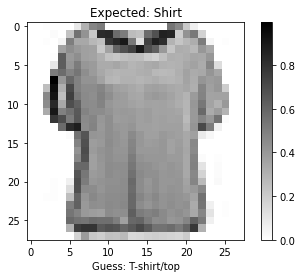

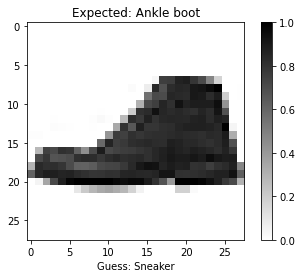

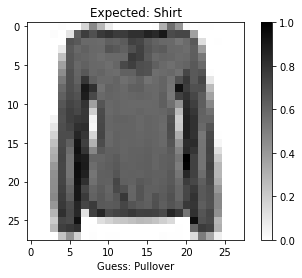

In [10]:
print('Missmatches: ', len(missmatches))
samples = np.random.choice(missmatches, size=10, replace=False)

for sample in samples:
    sample.plot()